In [4]:
# Test: loss

import numpy as np
import importlib
from cnn_from_scratch import loss_function

importlib.reload(loss_function)

rng = np.random.default_rng()
y_pred1 = rng.random(10)
y_pred2 = rng.random(10)
y_true = y_pred1.round(0)

print(loss_function.log_loss(y_true, y_true))
print(loss_function.log_loss(y_true, y_pred1))
print(round(loss_function.log_loss(np.ones(1), np.ones(1)), 9))

1.1102230246251565e-16
0.285770803311763
0.0


Text(0.5, 1.0, 'ReLU')

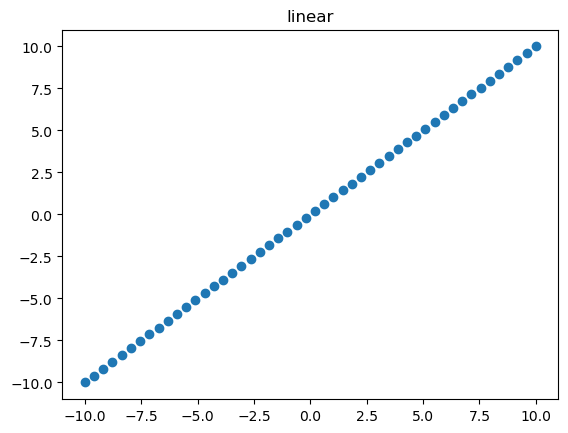

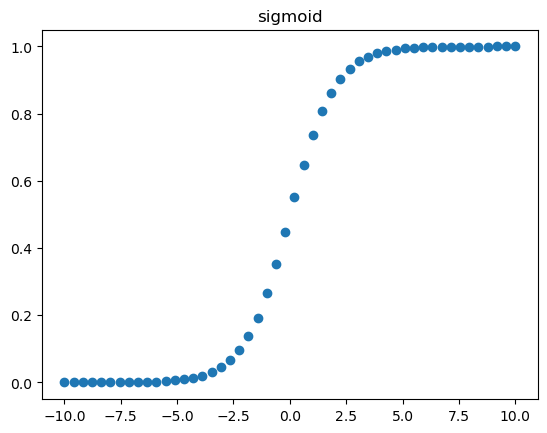

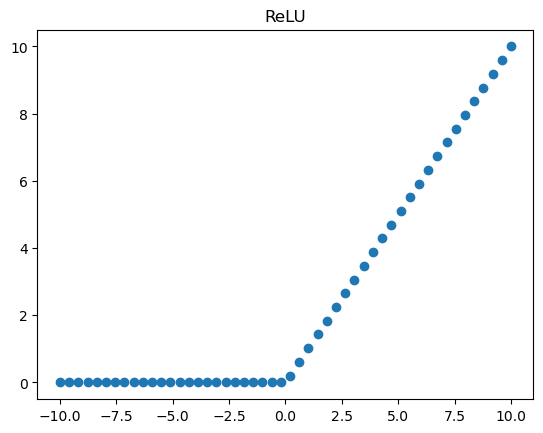

In [48]:
# Test: activation

import numpy as np
import importlib
import matplotlib.pyplot as plt
from cnn_from_scratch import activation_function

importlib.reload(activation_function)

# test_x = [10**(i - 2) for i in range(12)]
# test_x = np.array([-num for num in test_x[::-1]] + [0] + test_x)

test_x = np.linspace(-10, 10)

plt.figure()
plt.scatter(test_x, activation_function.linear_act(test_x))
# plt.xscale('log')
# plt.yscale('log')
plt.title('linear')

plt.figure()
plt.scatter(test_x, activation_function.sigmoid_act(test_x))
# plt.xscale('log')
# plt.yscale('log')
plt.title('sigmoid')

plt.figure()
plt.scatter(test_x, activation_function.ReLU_act(test_x))
# plt.xscale('log')
# plt.yscale('log')
plt.title('ReLU')